In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('pokemon0820.csv')

In [3]:
# ddf=df[df.is_legendary==0][df.generation==1]
ddf=df.query("is_legendary == 0").query("generation == 1")
ddf['main_attack']=np.where((ddf['attack']>ddf['sp_attack']),ddf['attack'],ddf['sp_attack'])
ddf['stats_total']=ddf['main_attack']+ddf['defense']+ddf['sp_defense']+ddf['hp']+ddf['speed']
ddf['point']=0
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 148
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          146 non-null    object 
 1   against_bug        146 non-null    float64
 2   against_dark       146 non-null    float64
 3   against_dragon     146 non-null    float64
 4   against_electric   146 non-null    float64
 5   against_fairy      146 non-null    float64
 6   against_fight      146 non-null    float64
 7   against_fire       146 non-null    float64
 8   against_flying     146 non-null    float64
 9   against_ghost      146 non-null    float64
 10  against_grass      146 non-null    float64
 11  against_ground     146 non-null    float64
 12  against_ice        146 non-null    float64
 13  against_normal     146 non-null    float64
 14  against_poison     146 non-null    float64
 15  against_psychic    146 non-null    float64
 16  against_rock       146 non

In [4]:
#小刚（岩石道馆）
dddf=ddf[ddf.against_rock >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1

Int64Index([129, 64, 141, 93, 126, 114], dtype='int64')
129      Gyarados
64       Alakazam
141    Aerodactyl
93         Gengar
126        Pinsir
114    Kangaskhan
Name: name, dtype: object


In [5]:
#小霞 （水系道馆）
dddf=ddf[ddf.against_water >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1

Int64Index([64, 141, 126, 93, 114, 5], dtype='int64')
64       Alakazam
141    Aerodactyl
126        Pinsir
93         Gengar
114    Kangaskhan
5       Charizard
Name: name, dtype: object


In [6]:
#马志士 （电系道馆）
dddf=ddf[ddf.against_electric >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1

Int64Index([129, 64, 141, 93, 126, 5], dtype='int64')
129      Gyarados
64       Alakazam
141    Aerodactyl
93         Gengar
126        Pinsir
5       Charizard
Name: name, dtype: object


In [7]:
# 莉佳 （草系道馆）
dddf=ddf[ddf.against_grass >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1

Int64Index([129, 64, 141, 114, 8, 79], dtype='int64')
129      Gyarados
64       Alakazam
141    Aerodactyl
114    Kangaskhan
8       Blastoise
79        Slowbro
Name: name, dtype: object


In [8]:
#阿吉&阿杏 （毒系道馆）
dddf=ddf[ddf.against_poison >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1

Int64Index([129, 64, 126, 5, 114, 8], dtype='int64')
129      Gyarados
64       Alakazam
126        Pinsir
5       Charizard
114    Kangaskhan
8       Blastoise
Name: name, dtype: object


In [9]:
#娜姿 （超能道馆）
dddf=ddf[ddf.against_psychic >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1

Int64Index([129, 141, 93, 126, 5, 114], dtype='int64')
129      Gyarados
141    Aerodactyl
93         Gengar
126        Pinsir
5       Charizard
114    Kangaskhan
Name: name, dtype: object


In [10]:
#夏伯 （火系道馆）
dddf=ddf[ddf.against_fire >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1

Int64Index([64, 93, 126, 114, 2, 17], dtype='int64')
64       Alakazam
93         Gengar
126        Pinsir
114    Kangaskhan
2        Venusaur
17        Pidgeot
Name: name, dtype: object


In [11]:
#坂木 （地面道馆）
dddf=ddf[ddf.against_ground >= 1]
dddf=dddf.sort_values('stats_total',ascending=False)
index=dddf.head(6).index
print(index)
print(ddf.loc[index]['name'])
ddf.loc[index,'point']+=1
max(ddf['point'])

Int64Index([64, 93, 114, 8, 2, 79], dtype='int64')
64       Alakazam
93         Gengar
114    Kangaskhan
8       Blastoise
2        Venusaur
79        Slowbro
Name: name, dtype: object


7

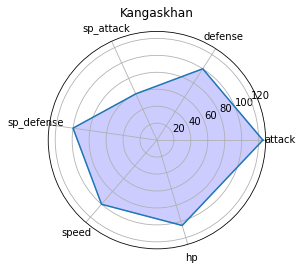

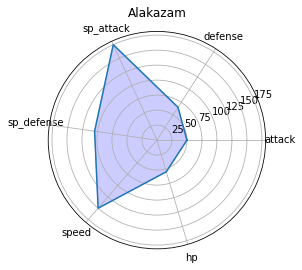

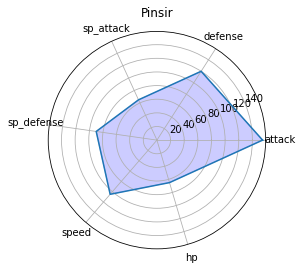

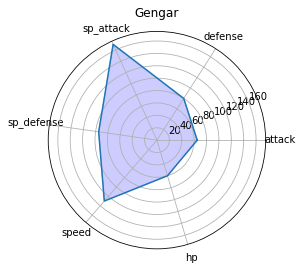

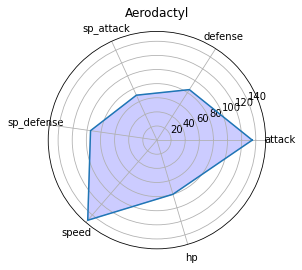

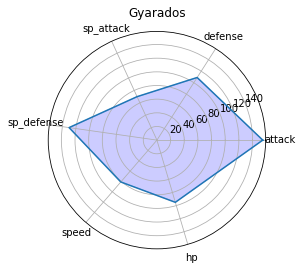

In [12]:
ddf=ddf.sort_values(by='point',ascending=False)
team=ddf.head(6)
index=team.index
for i in range(6):
    pokemon=team.loc[index[i]]
    features=['attack','defense','sp_attack','sp_defense','speed','hp']
    values=[pokemon.attack,pokemon.defense,pokemon.sp_attack,pokemon.sp_defense,pokemon.speed,pokemon.hp]
    features=np.concatenate((features,[features[0]]))
    values=np.concatenate((values,[values[0]]))
    ax=plt.polar(features,values)
    plt.title(pokemon['name'])
    plt.fill(features,values,color='blue',alpha=0.2)
    plt.show()

In [13]:
dddf.head(6)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,main_attack,stats_total,point
64,"['Synchronize', 'Inner Focus', 'Magic Guard']",2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,105,150,psychic,NaN,48.0,1,0,175,550,6
93,['Cursed Body'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,...,95,130,ghost,poison,40.5,1,0,170,535,5
114,"['Early Bird', 'Scrappy', 'Inner Focus']",1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,100,100,normal,NaN,80.0,1,0,125,530,6
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,...,115,78,water,NaN,85.5,1,0,135,527,2
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,120,80,grass,poison,100.0,1,0,122,525,1
79,"['Oblivious', 'Own Tempo', 'Regenerator']",2.00,2.0,1.0,2.0,1.0,0.5,0.5,1.0,2.0,...,80,30,water,psychic,78.5,1,0,130,515,1
